In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# EDA

In [8]:
# check for null values

In [10]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [12]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [14]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [16]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['Fuel_Type']

In [18]:
print(df.dtypes)


Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [20]:
#statistical summary

In [22]:
summary=df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [24]:
# outliers

In [26]:
IQR=summary['75%']-summary['25%']
IQR

Price         3500.00
Age_08_04       26.00
KM           44020.75
HP              20.00
Automatic        0.00
cc             200.00
Doors            2.00
Cylinders        0.00
Gears            0.00
Weight          45.00
dtype: float64

In [28]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [30]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

# FUNCTION TO DETECT OUTLIER

In [33]:
def find_outliers_with_extremes(df,column):
    Q1 = df[column].quantile(0.25)   # find Q1
    Q3 = df[column].quantile(0.75)   #Find Q2
    IQR = Q3 - Q1                    # Find IQR
    lower_bound = Q1 - 1.5 * IQR     # calcualte the lower bound
    upper_bound = Q3 + 1.5 * IQR     # calcualte the upper bound
    print(f"Lower_bond: {lower_bound}")
    print(f"Upper_bond: {upper_bound}") 
    
    outlier_rows = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # find the rows which has outlierd
    return outlier_rows,lower_bound,upper_bound  # return the value

In [35]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(df, 'Age_08_04')
outliers_df   
# it will give the extreme values also the rows containing the outliers


Lower_bond: 5.0
Upper_bond: 109.0


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,4,1,Diesel,116,0,2000,5,4,5,1480
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480
182,21125,2,225,Petrol,97,0,1400,5,4,5,1110
183,21500,2,15,Petrol,110,0,1600,5,4,5,1130
184,17795,1,1,Petrol,98,0,1400,4,4,5,1100
185,18245,1,1,Petrol,110,0,1600,5,4,5,1075


# REMOVE ROWS WITH OUTLIERS

In [38]:
df_no_outliers = df[(df['Age_08_04'] >= lower_bound) & (df['Age_08_04'] <= upper_bound)]
df_no_outliers   # removed outliers of Age_08_04 column

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [301]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(df, 'KM')
outliers_df #check outliers for KM column


Lower_bond: -23031.125
Upper_bond: 153051.875


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
186,6950,43,243000,Diesel,69,0,1900,3,4,5,1110
187,9500,38,180638,Diesel,90,0,2000,4,4,5,1160
188,11950,40,179860,Diesel,90,0,2000,5,4,5,1205
189,7750,43,178858,CNG,110,0,1600,3,4,5,1084
190,11950,40,161000,Diesel,69,0,1900,3,4,5,1105
191,4350,44,158320,Diesel,69,0,1800,5,4,5,1110
378,6500,53,216000,Diesel,69,0,1900,3,4,5,1110
379,6400,51,198167,Diesel,69,0,1900,4,4,5,1095
380,7000,53,176000,Diesel,69,0,1900,3,4,5,1105
381,7750,54,174139,Diesel,72,0,2000,4,4,5,1100


In [40]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(df, 'HP')
outliers_df   

Lower_bond: 60.0
Upper_bond: 140.0


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
16,22750,30,34000,Petrol,192,0,1800,3,4,5,1185
49,21950,31,64982,Petrol,192,0,1800,5,4,6,1195
53,21950,27,49866,Petrol,192,0,1800,5,4,5,1195


In [42]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(df, 'cc')
outliers_df 

Lower_bond: 1100.0
Upper_bond: 1900.0


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1195,8750,74,89800,Diesel,72,0,2000,3,4,5,1115
1202,6950,73,88186,Diesel,72,0,2000,3,4,5,1115
1216,8500,70,85864,Diesel,72,0,2000,5,4,5,1135
1320,9400,69,67092,Diesel,72,0,2000,3,4,5,1115


In [44]:
outliers_df, lower_bound, upper_bound = find_outliers_with_extremes(df, 'Weight')
outliers_df  

Lower_bond: 972.5
Upper_bond: 1152.5


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
601,7500,50,1,Diesel,90,0,2000,3,4,5,1260
654,6950,65,114383,Diesel,90,0,2000,3,4,5,1260
768,10950,59,78750,Diesel,90,0,1975,5,4,5,1155
960,9390,66,50806,Petrol,86,0,1300,3,4,5,1480


In [46]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [48]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [50]:
# i have not removed any outliers

In [52]:
target=df[['Price']]
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [54]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [56]:
features=df.drop(columns='Price')
features



,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


In [58]:
numerical_columns = features._get_numeric_data()


In [60]:
numerical_columns

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,90,0,2000,3,4,5,1165
1,23,72937,90,0,2000,3,4,5,1165
2,24,41711,90,0,2000,3,4,5,1165
3,26,48000,90,0,2000,3,4,5,1165
4,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025
1432,72,19000,86,0,1300,3,4,5,1015
1433,71,17016,86,0,1300,3,4,5,1015
1434,70,16916,86,0,1300,3,4,5,1015


# Standardization

In [63]:
from sklearn.preprocessing import RobustScaler

In [65]:
rob_sca=RobustScaler()


In [67]:
standardized_data=rob_sca.fit_transform(numerical_columns)


In [69]:
features[numerical_columns.columns]=standardized_data

In [71]:
standardized_data

array([[-1.46153846, -0.37263109, -1.        , ...,  0.        ,
         0.        ,  2.11111111],
       [-1.46153846,  0.21688635, -1.        , ...,  0.        ,
         0.        ,  2.11111111],
       [-1.42307692, -0.49246094, -1.        , ...,  0.        ,
         0.        ,  2.11111111],
       ...,
       [ 0.38461538, -1.05344639, -1.2       , ...,  0.        ,
         0.        , -1.22222222],
       [ 0.34615385, -1.05571804, -1.2       , ...,  0.        ,
         0.        , -1.22222222],
       [ 0.57692308, -1.43996865,  0.        , ...,  0.        ,
         0.        ,  0.97777778]])

In [73]:
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.461538,-0.372631,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111
1,-1.461538,0.216886,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111
2,-1.423077,-0.492461,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111
3,-1.346154,-0.349596,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111
4,-1.192308,-0.565404,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.222222
...,...,...,...,...,...,...,...,...,...,...
1431,0.307692,-0.973302,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.000000
1432,0.423077,-1.008377,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222
1433,0.384615,-1.053446,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222
1434,0.346154,-1.055718,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222


In [75]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
one_hot=OneHotEncoder()

In [79]:
one_hot.fit_transform(features[['Fuel_Type']]).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [81]:
df1=pd.DataFrame(one_hot.fit_transform(features[['Fuel_Type']]).toarray())

In [83]:
df1

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [85]:
df2=features.join(df1)
df2

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,0,1,2
0,-1.461538,-0.372631,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
1,-1.461538,0.216886,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
2,-1.423077,-0.492461,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
3,-1.346154,-0.349596,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
4,-1.192308,-0.565404,Diesel,-1.0,0.0,2.0,-0.5,0.0,0.0,2.222222,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.307692,-0.973302,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.000000,0.0,0.0,1.0
1432,0.423077,-1.008377,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1433,0.384615,-1.053446,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1434,0.346154,-1.055718,Petrol,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0


In [87]:
df2.drop(columns='Fuel_Type',inplace=True)
df2

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,0,1,2
0,-1.461538,-0.372631,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
1,-1.461538,0.216886,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
2,-1.423077,-0.492461,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
3,-1.346154,-0.349596,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
4,-1.192308,-0.565404,-1.0,0.0,2.0,-0.5,0.0,0.0,2.222222,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.307692,-0.973302,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.000000,0.0,0.0,1.0
1432,0.423077,-1.008377,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1433,0.384615,-1.053446,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1434,0.346154,-1.055718,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0


In [89]:
df['Fuel_Type'].unique()


array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [91]:
df2.rename(columns={0:'Diesel',1:'Petrol',2:'CNG'},inplace=True)
df2

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
0,-1.461538,-0.372631,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
1,-1.461538,0.216886,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
2,-1.423077,-0.492461,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
3,-1.346154,-0.349596,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
4,-1.192308,-0.565404,-1.0,0.0,2.0,-0.5,0.0,0.0,2.222222,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.307692,-0.973302,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.000000,0.0,0.0,1.0
1432,0.423077,-1.008377,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1433,0.384615,-1.053446,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1434,0.346154,-1.055718,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0


# MLR

# 1.split target and feature column

In [95]:
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [97]:
df2

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
0,-1.461538,-0.372631,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
1,-1.461538,0.216886,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
2,-1.423077,-0.492461,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
3,-1.346154,-0.349596,-1.0,0.0,2.0,-0.5,0.0,0.0,2.111111,0.0,1.0,0.0
4,-1.192308,-0.565404,-1.0,0.0,2.0,-0.5,0.0,0.0,2.222222,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.307692,-0.973302,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.000000,0.0,0.0,1.0
1432,0.423077,-1.008377,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1433,0.384615,-1.053446,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1434,0.346154,-1.055718,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0


# 2. split train nd test

In [100]:
from sklearn.model_selection import train_test_split

# model1

In [103]:
x_train,x_test,y_train,y_test=train_test_split(df2,target,train_size=0.8,random_state=100)

In [105]:
x_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
1349,0.346154,-0.054281,0.00,0.0,0.0,0.0,0.0,0.0,-0.777778,0.0,0.0,1.0
857,-0.038462,0.034631,0.00,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,1.0
902,0.076923,-0.099714,-1.20,0.0,-1.5,0.5,0.0,0.0,-0.777778,0.0,0.0,1.0
372,-0.807692,-1.052651,-0.65,0.0,-1.0,0.5,0.0,0.0,-0.222222,0.0,0.0,1.0
1377,0.461538,-0.160890,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.115385,0.229676,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
53,-1.307692,-0.307207,4.10,0.0,1.0,0.5,0.0,0.0,2.777778,0.0,0.0,1.0
350,-0.846154,-0.822782,-0.65,0.0,-1.0,0.5,0.0,0.0,-0.222222,0.0,0.0,1.0
79,-1.192308,-0.940227,-0.65,0.0,-1.0,0.5,0.0,0.0,0.888889,0.0,0.0,1.0


In [107]:
x_test

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
57,-1.346154,-0.463179,-0.65,0.0,-1.0,0.5,0.0,0.0,0.888889,0.0,0.0,1.0
1002,0.192308,-0.550774,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
360,-0.846154,-0.884708,0.00,0.0,0.0,-0.5,0.0,0.0,-0.666667,0.0,0.0,1.0
903,0.153846,-0.099714,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
1277,0.692308,0.243147,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
198,-0.730769,0.961126,-0.65,0.0,-1.0,-0.5,0.0,0.0,-1.000000,0.0,0.0,1.0
67,-1.500000,-0.749408,-0.65,0.0,-1.0,0.5,0.0,0.0,0.888889,0.0,0.0,1.0
517,-0.192308,-0.258730,-0.65,0.0,-1.0,-0.5,0.0,0.0,-1.000000,0.0,0.0,1.0
916,0.269231,-0.132313,-1.20,0.0,-1.5,0.5,0.0,0.0,-0.777778,0.0,0.0,1.0


In [109]:
y_train

,Price
1349,7150
857,8500
902,9950
372,11950
1377,8750
...,...
802,9250
53,21950
350,11895
79,14900


In [111]:
y_test

,Price
57,15250
1002,8250
360,12950
903,9750
1277,8800
...,...
198,9950
67,14950
517,10000
916,7950


# 3. train the data

In [114]:
from sklearn.linear_model import LinearRegression



In [116]:
lin_model=LinearRegression()

In [118]:
lin_model.fit(x_train,y_train)

LinearRegression()

# 4. Training validation

In [121]:
y_predict=lin_model.predict(x_train)
y_predict

array([[ 8623.61388044],
       [10529.93325994],
       [ 8933.03449544],
       ...,
       [13234.25742741],
       [15556.76227864],
       [ 9381.21696516]])

# 5. Training Accuracy

In [124]:
from sklearn.metrics import r2_score

In [126]:
r2_score(y_train,y_predict
        )


0.8683796900328317

# 6. Testing Validation

In [129]:
y_predict1=lin_model.predict(x_test)
y_predict1

array([[15663.99488619],
       [ 9875.44988876],
       [13184.47227425],
       [10144.12699943],
       [ 8175.92386197],
       [ 9544.52355332],
       [13246.39599533],
       [ 5245.60924563],
       [13783.78688679],
       [ 8078.38355162],
       [14103.835548  ],
       [ 8765.30475409],
       [11928.77480473],
       [ 7067.68291346],
       [17528.42493622],
       [ 8381.88003635],
       [14055.34928721],
       [15735.35345864],
       [16777.46759777],
       [ 9446.10842896],
       [11638.64252417],
       [ 8521.29622917],
       [11317.05354484],
       [10524.68063695],
       [ 8182.66460859],
       [ 9634.05600502],
       [ 8044.29182794],
       [ 9083.48566   ],
       [10825.98559643],
       [ 7451.27591657],
       [ 8341.03645151],
       [14088.22942232],
       [ 8481.79985806],
       [18438.97272542],
       [10403.50492012],
       [ 9000.80163213],
       [ 6143.8850625 ],
       [ 7746.47845885],
       [11449.57763296],
       [11217.29592817],


# 7 Testing Accuracy

In [132]:
r2_score(y_test,y_predict1)

0.844799982636023

In [134]:
lin_model.intercept_

array([9634.22865853])

In [136]:
lin_model.coef_

array([[-3.15126172e+03, -7.91486561e+02,  4.65767155e+02,
         2.97300679e+02, -1.09369712e+01, -6.48811520e+01,
        -5.68434189e-14,  6.27705393e+02,  1.02485489e+03,
        -8.46354108e+02,  1.20010203e+01,  8.34353088e+02]])

In [139]:
import seaborn as sns

<AxesSubplot:xlabel='Price'>

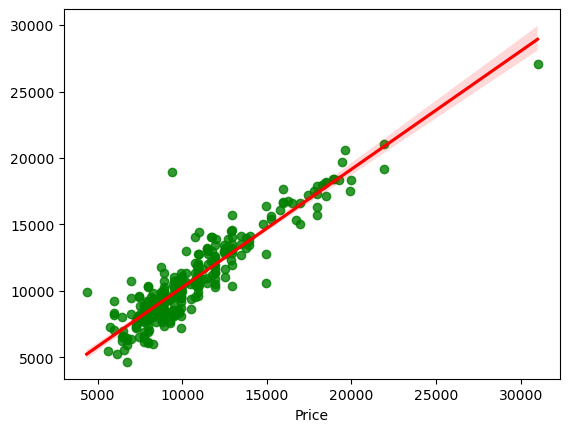

In [140]:
sns.regplot(data=df2,x=y_test,y=y_predict1,scatter_kws={'color':'green'},line_kws={'color':'red'})
# line is predicted,scatter is actual

# Lasso and RIDGE

In [142]:
from sklearn.linear_model import Lasso,Ridge

In [143]:
lasso1=Lasso(alpha=1)

In [145]:
lasso1.fit(x_train,y_train)

Lasso(alpha=1)

In [150]:
y_pred1=lasso1.predict(x_test)
y_pred1

array([15662.8610522 ,  9877.59799516, 13183.94572317, 10147.7979126 ,
        8180.58423648,  9525.55122513, 13244.60891019,  5243.65749608,
       13759.95704775,  8081.53673618, 14104.45617139,  8768.04682444,
       11931.24776545,  7064.8801569 , 17526.69359281,  8383.26316255,
       14058.18894071, 15733.59471154, 16773.69023302,  9448.44121211,
       11636.54369811,  8525.33835073, 11317.83882355, 10525.52394707,
        8278.91775336,  9637.62044114,  8047.04904599,  9052.31996258,
       10799.37117277,  7452.66203755,  8342.52918398, 14087.63835418,
        8484.78183841, 18437.44827533, 10406.37817727,  9000.95069748,
        6150.00702045,  7741.90902124, 11448.44696684, 11219.17924839,
        7796.03404792,  8092.14822972,  8827.1749968 , 14568.25885212,
        9726.47252794,  9348.05521668, 12136.62921535,  6930.96664295,
       11323.8266829 , 15008.18313229, 10696.24506279, 13263.50160357,
       11708.73829014, 13032.87047891, 18313.81534277, 10574.83039017,
      

In [457]:
r2_score(y_test,y_pred1)

0.8219925670077897

In [158]:
ridge1=Ridge(alpha=1)

In [160]:
ridge1.fit(x_train,y_train)

Ridge(alpha=1)

In [162]:
y_pred2=ridge1.predict(x_test)
y_pred2

array([[15655.76779805],
       [ 9881.71423969],
       [13182.09780165],
       [10148.20845734],
       [ 8183.44827468],
       [ 9546.76457355],
       [13242.42428318],
       [ 5245.50433236],
       [13771.93038207],
       [ 8082.81183254],
       [14098.76595985],
       [ 8768.3933231 ],
       [11927.07185636],
       [ 7060.31017603],
       [17518.04251013],
       [ 8387.57510556],
       [14055.33536506],
       [15732.04988853],
       [16769.20341595],
       [ 9453.05840564],
       [11632.37314893],
       [ 8523.32604522],
       [11317.06153158],
       [10523.15732077],
       [ 8250.61303449],
       [ 9638.26793781],
       [ 8048.4206503 ],
       [ 9062.45349836],
       [10813.29797471],
       [ 7452.06613764],
       [ 8337.11194544],
       [14080.62713726],
       [ 8491.1457552 ],
       [18427.9998536 ],
       [10405.73196804],
       [ 9003.47668883],
       [ 6151.79772984],
       [ 7738.77909396],
       [11445.10785465],
       [11215.43137866],


In [164]:
r2_score(y_test,y_pred2)

0.8450560151487729

# model2

In [167]:
# split the train and test data

In [169]:
x_train,x_test,y_train,y_test=train_test_split(df2,target,train_size=0.7,random_state=200)

In [171]:
x_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
876,0.192308,-0.028498,-1.2,0.0,-1.5,0.5,0.0,0.0,-0.777778,0.0,0.0,1.0
1228,0.615385,0.468200,0.0,0.0,0.0,0.5,0.0,0.0,0.333333,0.0,0.0,1.0
1138,0.576923,0.930345,0.0,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
983,0.192308,-0.417746,-1.2,0.0,-1.5,0.5,0.0,0.0,-0.777778,0.0,0.0,1.0
866,-0.115385,0.010915,-1.9,0.0,2.0,0.5,0.0,0.0,1.444444,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.500000,1.355895,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
844,0.153846,0.059302,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
810,-0.153846,0.195601,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
784,0.000000,0.277585,-1.2,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0


In [173]:
x_test

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
773,0.230769,0.327834,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
1378,0.692308,-0.163003,-1.20,0.0,-1.5,-0.5,0.0,0.0,-1.222222,0.0,0.0,1.0
1405,0.576923,-0.408432,-1.20,0.0,-1.5,0.5,0.0,0.0,-0.777778,0.0,0.0,1.0
537,-0.269231,-0.375584,-0.65,0.0,-1.0,0.5,0.0,0.0,-0.222222,0.0,0.0,1.0
982,0.153846,-0.417746,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.307692,-0.258730,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
759,0.038462,0.377333,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
1143,0.538462,0.877211,-0.15,1.0,0.0,0.5,0.0,0.0,0.777778,0.0,0.0,1.0
391,-0.346154,1.632605,-2.05,0.0,1.5,0.5,0.0,0.0,1.555556,0.0,1.0,0.0


In [175]:
y_train

,Price
876,8750
1228,7750
1138,8750
983,7950
866,10950
...,...
1103,7950
844,7800
810,7950
784,8950


In [177]:
y_test

,Price
773,10950
1378,9500
1405,7750
537,9550
982,8850
...,...
1389,8750
759,10950
1143,8950
391,8250


In [179]:
# apply linear regression

In [181]:
lin_model1=LinearRegression()

In [183]:
lin_model1.fit(x_train,y_train)


LinearRegression()

In [185]:
# training validation

In [187]:
y_predict=lin_model1.predict(x_train)
y_predict

array([[8531.22045658],
       [8456.11541122],
       [7452.51125047],
       ...,
       [9056.66008538],
       [8520.72727732],
       [9020.97369618]])

In [189]:
# training accuracy

In [191]:
r2_score(y_train,y_predict)

0.8794476108369094

In [193]:
# testing validation

In [195]:
y_predict_=lin_model.predict(x_test)
y_predict_

array([[ 9563.32346086],
       [ 6653.27847168],
       [ 7601.74982119],
       [11062.27045673],
       [10395.84492471],
       [ 9025.34812214],
       [ 9652.96758821],
       [ 8428.06188427],
       [18270.19467209],
       [13001.06868714],
       [ 9915.27288903],
       [ 8118.4628408 ],
       [10636.6773267 ],
       [ 7876.59509626],
       [14722.46475745],
       [10759.90173256],
       [ 5950.57074616],
       [ 5245.60924563],
       [ 9987.09417293],
       [ 7956.90473051],
       [ 9892.97825849],
       [ 9671.92592917],
       [ 7850.79098087],
       [12871.1717215 ],
       [12280.01550314],
       [ 9307.01706678],
       [12362.70347642],
       [14049.84577883],
       [ 8198.95321692],
       [ 9219.86964369],
       [11188.32090549],
       [ 8708.89984147],
       [11982.33620472],
       [ 9261.22656937],
       [ 8040.11959177],
       [ 9966.32567371],
       [14567.12277517],
       [ 7558.29901568],
       [ 9198.69644324],
       [ 9690.6206188 ],


In [197]:
# testing accuracy

In [199]:
r2_score(y_test,y_predict_)

0.8306922218836377

In [201]:
lin_model1.intercept_

array([9571.08903685])

In [203]:
lin_model1.coef_

array([[-3.04514734e+03, -8.22703808e+02,  2.56997800e+02,
         1.35190049e+02, -4.87577314e+00, -1.84028277e+02,
        -1.15463195e-14,  7.26789868e+02,  1.18870003e+03,
        -4.44893164e+02, -3.95040470e+02,  8.39933634e+02]])

<AxesSubplot:xlabel='Price'>

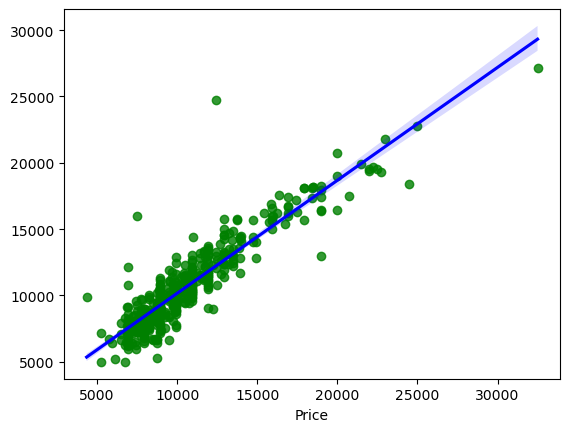

In [205]:
sns.regplot(data=df2,x=y_test,y=y_predict_,scatter_kws={'color':'green'},line_kws={'color':'blue'})

In [207]:
lasso2=Lasso(alpha=1)

In [209]:
lasso2.fit(x_train,y_train)

Lasso(alpha=1)

In [211]:
y_pred3=lasso2.predict(x_test)

In [213]:
y_pred3

array([ 9481.38005633,  6778.80948566,  7679.29863043, 11024.58056068,
       10331.03931075,  8929.56221302,  9594.13279592,  8454.20839166,
       18226.67846645, 13088.87566355,  9826.05946592,  8179.93734563,
       10420.72974037,  7844.63691108, 14709.82391281, 10916.81279889,
        6496.98381216,  5410.59834987,  9943.27257785,  7915.37371852,
        9783.86544344,  9586.04870448,  7818.00588779, 12798.25678105,
       12174.53710793,  9242.6597562 , 12075.95418756, 14111.5574227 ,
        8162.31976168,  9200.36051431, 11277.96757906,  8781.49548969,
       11946.64377064,  9137.79388635,  7977.67082923, 10086.13220504,
       14380.11419293,  7725.23872454,  9178.37599381,  9623.65941132,
       11595.58095033,  8924.10636706,  7751.35029004,  9861.1908903 ,
       12804.71389779,  8483.03750399,  8568.8795479 ,  8377.4975951 ,
       11613.63619073, 12415.66549356,  7576.41433301, 10405.2998197 ,
       15782.68872914, 11419.43889718,  8051.37557489, 18355.40420532,
      

In [215]:
r2_score(y_test,y_pred3)

0.8219925670077897

In [217]:
ridge2=Ridge(alpha=1)

In [219]:
ridge2.fit(x_train,y_train)

Ridge(alpha=1)

In [221]:
y_pred4=ridge2.predict(x_test)
y_pred4

array([[ 9481.85585335],
       [ 6781.33352799],
       [ 7680.05706397],
       [11022.13316542],
       [10333.29467177],
       [ 8928.6896147 ],
       [ 9596.73202807],
       [ 8449.32819169],
       [18235.73209334],
       [13088.20963418],
       [ 9827.70097412],
       [ 8200.7092603 ],
       [10420.5097845 ],
       [ 7847.57984191],
       [14704.32472562],
       [10923.86284976],
       [ 6480.34980923],
       [ 5412.58925555],
       [ 9942.98946229],
       [ 7919.13750156],
       [ 9784.06561987],
       [ 9582.54206347],
       [ 7821.27992476],
       [12794.48125561],
       [12171.3613366 ],
       [ 9244.63413101],
       [12073.25475643],
       [14111.35772445],
       [ 8165.54832614],
       [ 9201.13043535],
       [11277.16439   ],
       [ 8781.58503798],
       [11944.94847405],
       [ 9135.09540998],
       [ 7978.94359117],
       [10089.46215062],
       [14376.36944763],
       [ 7730.35398565],
       [ 9202.43241744],
       [ 9625.29351986],


In [223]:
r2_score(y_test,y_pred4)

0.8219643247952861

# model3

In [227]:
# split the train test data

In [229]:
x_train,x_test,y_train,y_test=train_test_split(df2,target,train_size=0.75,random_state=450)

In [231]:
x_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
115,-2.038462,-1.303692,-1.00,0.0,2.0,0.5,0.0,0.0,4.666667,0.0,1.0,0.0
1169,0.500000,0.740798,0.00,0.0,0.0,0.5,0.0,0.0,0.333333,0.0,0.0,1.0
1254,0.653846,0.309184,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
1391,0.346154,-0.261593,-1.20,0.0,-1.5,0.0,0.0,0.0,-1.555556,0.0,0.0,1.0
910,-0.038462,-0.116320,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0.730769,0.163730,-0.15,1.0,0.0,-0.5,0.0,0.0,0.222222,0.0,0.0,1.0
561,-0.269231,-0.554046,-0.65,0.0,-1.0,-0.5,0.0,0.0,-1.000000,0.0,0.0,1.0
1322,0.692308,0.078724,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
462,-0.576923,0.140491,-0.65,0.0,-1.0,0.5,0.0,0.0,-0.111111,0.0,0.0,1.0


In [233]:
x_test

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Diesel,Petrol,CNG
363,-0.807692,-0.903517,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
23,-1.269231,-0.708064,0.00,0.0,0.0,-0.5,0.0,0.0,1.111111,0.0,0.0,1.0
437,-0.500000,0.345530,0.00,0.0,0.0,0.5,0.0,0.0,0.111111,0.0,0.0,1.0
645,0.269231,1.239540,0.00,1.0,0.0,0.0,0.0,0.0,-0.111111,0.0,0.0,1.0
812,0.153846,0.180086,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
892,-0.153846,-0.054281,0.00,0.0,0.0,-0.5,0.0,0.0,-0.444444,0.0,0.0,1.0
1315,0.346154,0.104735,-1.20,1.0,-1.5,-0.5,0.0,0.0,-0.555556,0.0,0.0,1.0
539,-0.346154,-0.384830,0.00,0.0,0.0,0.0,0.0,0.0,-0.777778,0.0,0.0,1.0
46,-1.307692,0.363136,-1.00,0.0,2.0,0.5,0.0,0.0,4.111111,0.0,1.0,0.0


In [235]:
y_train

,Price
115,24990
1169,9250
1254,8000
1391,8950
910,8950
...,...
1303,8500
561,10750
1322,8950
462,10750


In [237]:
y_test

,Price
363,13450
23,16950
437,9750
645,8600
812,8950
...,...
892,9450
1315,8950
539,11750
46,17950


In [239]:
# learn the model

In [241]:
lin_model2=LinearRegression()

In [243]:
lin_model2.fit(x_train,y_train)

LinearRegression()

In [245]:
#training validation

In [247]:
y_predict1 =lin_model2.predict(x_train)
y_predict1

array([[21750.16185362],
       [ 8775.48676418],
       [ 7809.93869215],
       ...,
       [ 8289.83708245],
       [11716.52343504],
       [ 8022.17229929]])

In [249]:
#training accuracy

In [251]:
r2_score(y_train,y_predict1)

0.8776575516784637

In [253]:
# testing validation

In [255]:
y_predict2=lin_model2.predict(x_test)
y_predict2

array([[13436.21264899],
       [16562.58820822],
       [11710.42832097],
       [ 8668.83860881],
       [ 9398.53622596],
       [10342.07288819],
       [17735.22070774],
       [ 8140.81093281],
       [ 9108.34429354],
       [ 9537.41987594],
       [17851.24234654],
       [ 9310.11775193],
       [14917.79965946],
       [ 7619.64474097],
       [ 8686.11398548],
       [10722.16636665],
       [11222.57496637],
       [11286.74293796],
       [ 5944.89147547],
       [ 9255.13273317],
       [13382.66940666],
       [13108.98730108],
       [10914.62045701],
       [13240.02338277],
       [10311.95782159],
       [ 8067.3132462 ],
       [18431.46432483],
       [ 8996.81654663],
       [ 9531.47354849],
       [ 8156.404782  ],
       [ 8774.26981156],
       [11287.4368977 ],
       [10494.35933032],
       [ 9577.52211299],
       [10603.82392545],
       [14095.48549069],
       [12151.71291892],
       [ 8400.00116637],
       [ 7427.46180476],
       [ 8070.76196114],


In [257]:
#testing accuracy

In [259]:
r2_score(y_test,y_predict2)

0.804159931190078

<AxesSubplot:xlabel='Price'>

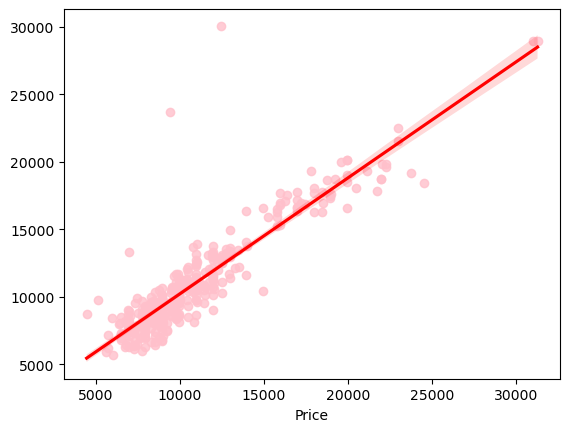

In [261]:
sns.regplot(data=df2,x=y_test,y=y_predict2,scatter_kws={'color':'pink'},line_kws={'color':'red'})

In [263]:
lasso3=Lasso(alpha=1)

In [265]:
lasso3.fit(x_train,y_train)


Lasso(alpha=1)

In [267]:
y_pred5=lasso3.predict(x_test)

In [270]:
y_pred5

array([13442.28809416, 16544.91137589, 11712.49059012,  8676.6751803 ,
        9398.39602411, 10345.33357354, 17724.38107247,  8140.16119252,
        9105.01834128,  9538.57765198, 17840.45598714,  9319.78405915,
       14927.70053818,  7618.53196028,  8686.51783844, 10722.27481356,
       11224.54735615, 11287.39504004,  5935.7718476 ,  9264.72240321,
       13386.18832782, 13114.52814744, 10880.5566968 , 13244.30627376,
       10323.36677835,  8067.98358656, 18421.88183577,  9009.34270372,
        9528.00659172,  8152.37582464,  8769.2715624 , 11291.2010999 ,
       10495.86777053,  9578.18683567, 10606.73490688, 14101.75715863,
       12153.09685028,  8409.39735762,  7436.70075745,  8081.25430236,
       17747.4275177 ,  7103.80282614, 10620.74173526,  8663.8338618 ,
       16254.19131637, 11832.98882577,  8792.11230989, 13010.0575257 ,
        9543.37649164, 18744.93977308,  8185.386825  ,  8616.17390605,
       16336.87566322,  9727.69221528, 10644.63267798,  7147.1401853 ,
      

In [272]:
r2_score(y_test,y_pred5)

0.8058122996017882

In [274]:
ridge3=Ridge(alpha=1)

In [276]:
ridge3.fit(x_train,y_train)

Ridge(alpha=1)

In [278]:
y_pred6=ridge3.predict(x_test)
y_pred6

array([[13441.71584225],
       [16541.76434607],
       [11707.3669889 ],
       [ 8670.82761013],
       [ 9400.55107853],
       [10348.62751817],
       [17716.01601207],
       [ 8148.17919938],
       [ 9102.11813121],
       [ 9536.69244338],
       [17831.80485229],
       [ 9320.80003346],
       [14929.57273049],
       [ 7624.64739959],
       [ 8692.81166818],
       [10720.73843518],
       [11225.69123241],
       [11284.94282507],
       [ 5928.80173185],
       [ 9271.38796313],
       [13383.77549574],
       [13113.71180702],
       [10897.64447845],
       [13244.51324247],
       [10319.17427714],
       [ 8072.61103119],
       [18414.36334915],
       [ 9004.61893349],
       [ 9525.77387098],
       [ 8153.72341855],
       [ 8765.66950208],
       [11292.3538701 ],
       [10498.45294051],
       [ 9581.87679029],
       [10607.79714557],
       [14096.31608024],
       [12149.72835591],
       [ 8411.76680735],
       [ 7442.25936073],
       [ 8084.0638923 ],


In [280]:
r2_score(y_test,y_pred6)

0.8058441611870434